In [1]:
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn_objects_recipes as sor
import seaborn as sns
import numpy as np
import pandas as pd


penguins = sns.load_dataset('penguins')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
def sample_data():
    # Parameters for simulation
    game = "ExampleGame"
    agents = ["Agent1", "Agent2", "Agent3"]
    num_iterations = 200
    num_agents = len(agents)

    # Create a simulated DataFrame
    np.random.seed(0)  # For reproducible results
    data = {
        "Game": [game] * num_iterations * num_agents,
        "Episodic Return": np.random.rand(num_iterations * num_agents) * 100,
        "Iteration": list(range(num_iterations)) * num_agents,
        "Agent": np.repeat(agents, num_iterations),
    }

    return pd.DataFrame(data)


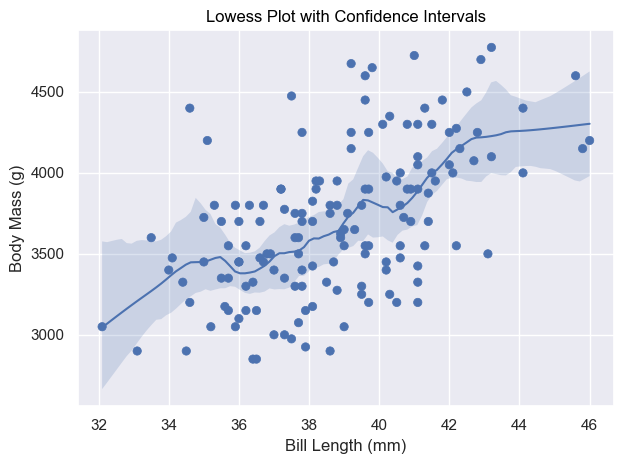

In [4]:
# Example usage with seaborn.objects
# Prepare data
data = penguins.copy()
data = data[data['species'] == 'Adelie']

# Create the plot
plot = (
    so.Plot(data, x="bill_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(so.Line(), lowess := sor.Lowess(frac=0.2, gridsize=100, num_bootstrap=200, alpha=0.95))
    .add(so.Band(), lowess)
    .label(x="Bill Length (mm)", y="Body Mass (g)", title="Lowess Plot with Confidence Intervals")
)

# Show the plot
plot.show()

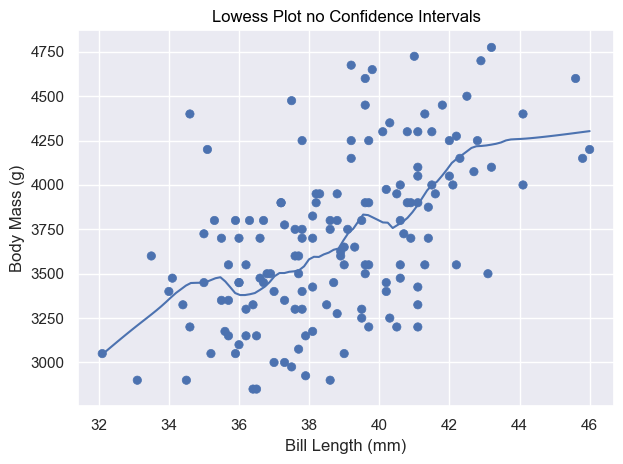

In [3]:
# Example usage with seaborn.objects
# Prepare data
data = penguins.copy()
data = data[data['species'] == 'Adelie']

# Create the plot
plot = (
    so.Plot(data, x="bill_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(so.Line(), sor.Lowess())
    .label(x="Bill Length (mm)", y="Body Mass (g)", title="Lowess Plot no Confidence Intervals")
)

# Show the plot
plot.show()

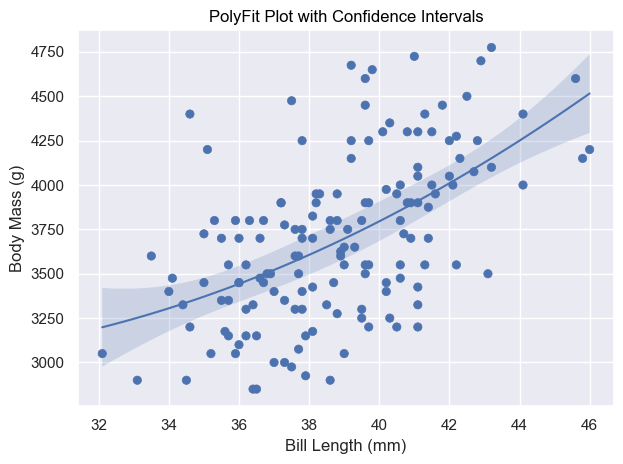

In [2]:
# Example usage with seaborn.objects
# Prepare data
data = penguins.copy()
data = data[data['species'] == 'Adelie']

# Create the plot
plot = (
    so.Plot(data, x="bill_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(so.Line(), PolyFitWithCI := sor.PolyFitWithCI(order=2, gridsize=100, alpha=0.05))
    .add(so.Band(), PolyFitWithCI)
    .label(x="Bill Length (mm)", y="Body Mass (g)", title="PolyFit Plot with Confidence Intervals")
)

# Show the plot
plot.show()

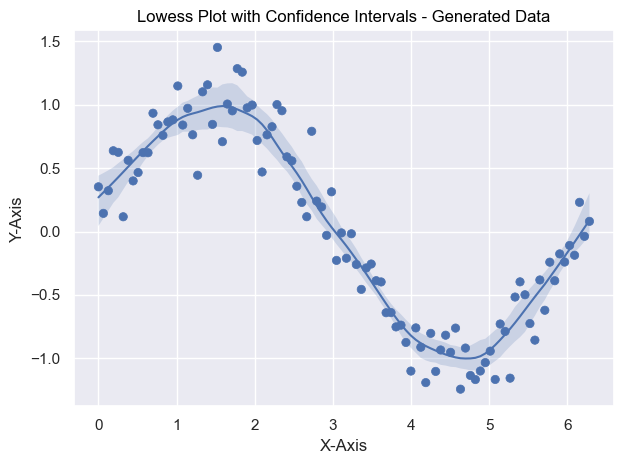

In [3]:
# Generate data for testing
np.random.seed(0)
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(size=100) * 0.2
data = pd.DataFrame({"x": x, "y": y})

# Create the plot
plot = (
    so.Plot(data, x="x", y="y")
    .add(so.Dot())
    .add(so.Line(), lowess := sor.Lowess(frac=0.2, gridsize=100, num_bootstrap=200, alpha=0.95))
    .add(so.Band(), lowess)
    .label(x="X-Axis", y="Y-Axis", title="Lowess Plot with Confidence Intervals - Generated Data")
)

# Show the plot
plot.show()